In [2]:
import numpy as np
import matplotlib.pyplot as matplt


# Default values
# define the parameters for the simulation
# x(t) = A * cos(2*π*ft + φ)
# A = 1 # amplitude for x(t)
# f = 10 # frequency (Hz) of continuous time sinusoid x(t)
# phi = np.pi/5 # phase or φ (radians) for x(t)
# f_s = 12 # sampling rate (Hz) for x[n]

In [3]:
# define the parameters for the simulation
# x(t) = A * cos(2*pi*f*t + phi)
A = 1; # amplitude of x(t)
f = 10; # frequency (Hz) of continuous time sinusoid x(t)
phi = -np.pi/5 # phase (radians) for x(t)
f_s = 8 # sampling rate (Hz) for x[n]
fs_t = f_s*1000; # sampling rate (Hz) for x(t) >> f_s to approximate x(t) as continuous time
t = np.arange(0,4/f,1/fs_t) # define continuous time variable

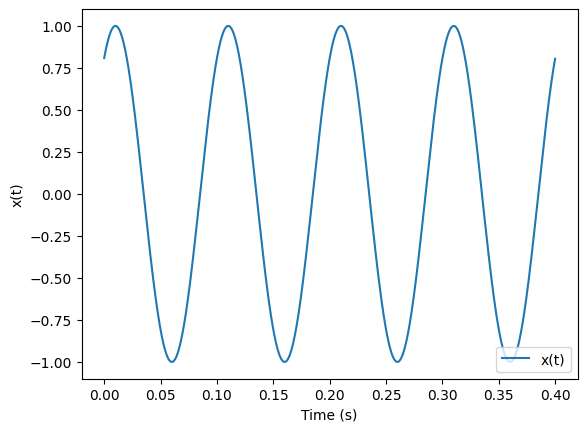

In [4]:
x_t = A*np.cos(2*np.pi*f*t + phi)
fig1, ax1=matplt.subplots()
ax1.plot(t,x_t)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("x(t)")
ax1.legend(['x(t)'], loc="lower right")

<class 'float'>


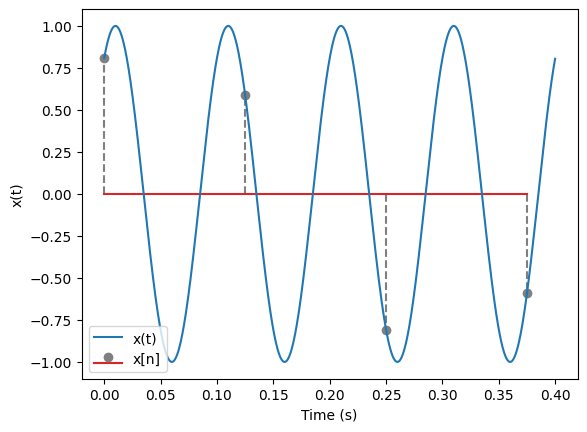

In [5]:
# 
n_samples = fs_t/f_s # sample period for x[n]
n_ = np.arange(0,len(x_t),np.int64(n_samples)); print(type(n_samples)) # discrete samples for x[n]
x_n = x_t[n_]; # x[n]

fig2, ax2=matplt.subplots()
ax2.stem(n_/fs_t, x_n, linefmt='C7--', markerfmt='C7o') # plot x[n]
ax2.plot(t,x_t) # plot x(t)

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("x(t)")
ax2.legend(['x(t)','x[n]'], loc="lower left")

In [6]:
w_hat = 2*np.pi*f/f_s # compute digital frequency

# find principle alias

if (f_s <= 2*f):
    print('Nyquist sampling criteria not met, f_s <= 2*f')

    print('w_hat = ' + str(w_hat/np.pi))
    while (w_hat > np.pi):
        # alias or fold
        w_hat = w_hat - 2*np.pi

    if (w_hat > 0):
        print('Alias, phase unchanged')
        #print('phi unchanged')
        phi_recon=phi
        f_recon=w_hat*f_s/2/np.pi
    elif (w_hat < 0):
        print('Folding, phase change')
        #print('phase change')
        phi_recon=-1*phi
        f_recon=-1*w_hat*f_s/2/np.pi
    elif (w_hat == 0):
        print('w_hat = 0, dc')
elif (f_s > 2*f):
    print('Nyquist sampling criteria met, f_s > 2*f')
    phi_recon=phi
    f_recon=w_hat*f_s/2/np.pi

print('principal alias for w_hat = ' + str(w_hat/np.pi))

Nyquist sampling criteria not met, f_s <= 2*f
w_hat = 2.5
Alias, phase unchanged
principal alias for w_hat = 0.5


frequency in radians for positive w_hat and corresponding aliases = [-1.5  0.5  2.5]
frequency in radians for negative w_hat and corresponding aliases = [-2.5 -0.5  1.5]
complex amplitude for green lines: 0.5exp(-0.6283185307179586)
complex amplitude for grey lines: 0.5exp(0.6283185307179586)


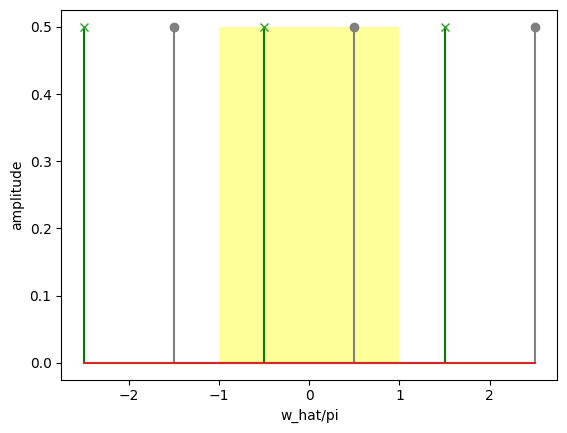

In [8]:
#print(phi_recon)
# plot spectrum for x[n]
pos_freq=np.array([w_hat-2*np.pi, w_hat, w_hat+2*np.pi])
print("frequency in radians for positive w_hat and corresponding aliases = " + str(pos_freq/np.pi))
neg_freq=np.array([-1*w_hat-2*np.pi,-1*w_hat,-1*w_hat+2*np.pi])
print("frequency in radians for negative w_hat and corresponding aliases = "  + str(neg_freq/np.pi))

fig4, ax4=matplt.subplots()
ax4.stem(pos_freq/np.pi, [A/2, A/2, A/2], 'grey', markerfmt='C7o')
ax4.stem(neg_freq/np.pi, [A/2, A/2, A/2], 'green', markerfmt='C2x')

ax_range=np.arange(-1,1,0.01)
ax4.fill_between(ax_range,0.5,where=ax_range>=-1, facecolor='yellow',alpha=0.4)
ax4.set_xlabel('w_hat/pi'); ax4.set_ylabel('amplitude')

#if (w_hat < 0):
#phi_to_plot=phi_recon;

print('complex amplitude for green lines: ' + str(A/2) + 'exp(' + str(phi_recon) + ')')
print('complex amplitude for grey lines: ' + str(A/2) + 'exp(' + str(phi_recon*-1) + ')')



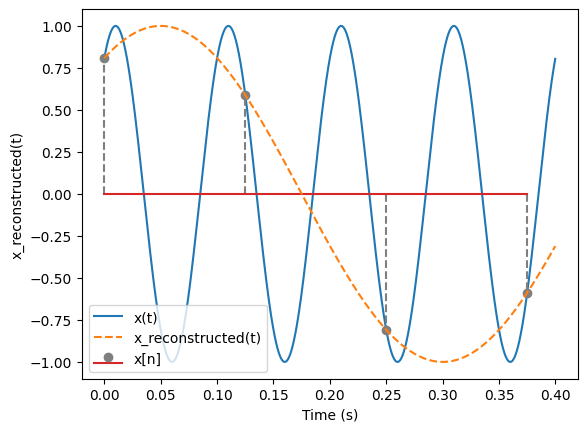

In [9]:
# plot x_reconstructed(t)
x_t_recon = np.cos(2*np.pi*f_recon*t + phi_recon)

fig3, ax3=matplt.subplots()
ax3.plot(t,x_t)
ax3.stem(n_/fs_t,x_n, linefmt='C7--', markerfmt='C7o')
ax3.plot(t,x_t_recon, linestyle='dashed')

ax3.set_xlabel("Time (s)")
ax3.set_ylabel("x_reconstructed(t)")

ax3.legend(['x(t)','x_reconstructed(t)','x[n]'], loc="lower left")